In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import gmaps

import pandas as pd
import numpy as np

import requests
import json

In [2]:
#Carga el archivo listings aqui: listings_(Nombre de Ciudad).csv
#Carga el archivo summary aqui: summary_(Nombre de Ciudad).csv
fullPath = "C:/Users/karsa_000/Desktop/airbnb/listings_sevilla.csv"
summPath = "C:/Users/karsa_000/Desktop/airbnb/summary_sevilla.csv"

In [3]:
full_df = pd.read_csv(fullPath)

In [4]:
summ_df = pd.read_csv(summPath)

In [5]:
full_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,32347,https://www.airbnb.com/rooms/32347,20190218232050,2019-02-19,SevillaCenter,NaN,Enjoy the atmosphere typical of Seville in thi...,Enjoy the atmosphere typical of Seville in thi...,none,"The apartment is in the center of Seville, 50 ...",...,t,f,super_strict_60,f,f,1,1,0,0,1.23
1,49287,https://www.airbnb.com/rooms/49287,20190218232050,2019-02-18,BEAUTIFUL APARTMENT IN SEVILLE,Nice apartment on the second floor of a beauti...,The apartment has one bedroom with a double be...,Nice apartment on the second floor of a beauti...,none,The famous Plaza de Hercules has changed a lot...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.30
2,94187,https://www.airbnb.com/rooms/94187,20190218232050,2019-02-19,(2) ROOM + PRIVATE BATHROOM. CASA DEL BUEN VIAJE,The Casa del Buen Viaje is ideally located in ...,Lovely tipical house in the very center of old...,The Casa del Buen Viaje is ideally located in ...,none,La proximidad de la plaza Pilatos y la Iglesia...,...,f,f,strict_14_with_grace_period,f,f,6,0,6,0,0.79
3,108236,https://www.airbnb.com/rooms/108236,20190218232050,2019-02-18,Sunny apt in heart of seville!!,"Clean, quiet and cosy 2-bedroom apartment near...",****PLEASE INQUIRE ABOUT AVAILABILITY BEFORE T...,"Clean, quiet and cosy 2-bedroom apartment near...",none,"The apartment is located in a prime, picturesq...",...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,1.47
4,108568,https://www.airbnb.com/rooms/108568,20190218232050,2019-02-19,TERRACE ALAME WIFI PARKING DOWNTOWN,A magnificent 2 bedrooms apartment with Príva...,This spacious 2 br apartment in the quaintest ...,A magnificent 2 bedrooms apartment with Príva...,none,La Alameda de Hércules es un gran espacio en p...,...,t,f,strict_14_with_grace_period,f,f,11,11,0,0,0.79


In [6]:
len(full_df)

5270

In [7]:
summ_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,32347,SevillaCenter,139939,Alejandro,Casco Antiguo,San Vicente,37.39468,-6.00183,Entire home/apt,99,2,122,2019-01-02,1.23,1,302
1,49287,BEAUTIFUL APARTMENT IN SEVILLE,224697,Walter,Casco Antiguo,Feria,37.39855,-5.99365,Entire home/apt,49,3,29,2019-02-16,0.30,1,259


In [8]:
len(summ_df)

5270

In [9]:
new_df = full_df[["id","name","experiences_offered","house_rules","host_id","host_since","host_location","host_response_time","host_response_rate","host_is_superhost","host_listings_count","host_total_listings_count","host_verifications","host_has_profile_pic","host_identity_verified","zipcode","city","state","country","latitude","longitude","is_location_exact","property_type","room_type","accommodates","bathrooms","bedrooms","beds","bed_type","amenities","square_feet","price","weekly_price","monthly_price","security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights","maximum_nights","availability_365","number_of_reviews","number_of_reviews_ltm","review_scores_rating","instant_bookable","cancellation_policy","require_guest_profile_picture","require_guest_phone_verification","reviews_per_month"]]

In [10]:
new_df.head()

,id,name,experiences_offered,house_rules,host_id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,...,maximum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,32347,SevillaCenter,none,NaN,139939,2010-06-07,Spain,within an hour,100%,t,...,120,302,122,25,97.0,t,super_strict_60,f,f,1.23
1,49287,BEAUTIFUL APARTMENT IN SEVILLE,none,Please respect the neigbours. No loud music or...,224697,2010-09-05,"Sevilla, Andalucía, Spain",within an hour,100%,f,...,365,259,29,12,91.0,t,strict_14_with_grace_period,f,f,0.30
2,94187,(2) ROOM + PRIVATE BATHROOM. CASA DEL BUEN VIAJE,none,Que sean respectuosos de la casa y tranquilos...,503692,2011-04-12,"Sevilla, Andalucía, Spain",within a few hours,93%,f,...,365,359,71,6,87.0,f,strict_14_with_grace_period,f,f,0.79
3,108236,Sunny apt in heart of seville!!,none,- Please respect local customs (including the ...,560040,2011-05-05,"Sevilla, Andalucía, Spain",within a few hours,100%,f,...,1125,253,139,3,95.0,f,strict_14_with_grace_period,t,t,1.47
4,108568,TERRACE ALAME WIFI PARKING DOWNTOWN,none,Las reglas de la casa no difieren del uso habi...,589600,2011-05-15,"Sevilla, Andalucía, Spain",within an hour,100%,f,...,365,262,71,13,91.0,t,strict_14_with_grace_period,f,f,0.79


In [11]:
airbnb_df = pd.merge(new_df,summ_df,how = "left",on = "id")

In [12]:
airbnb_df.head()

,id,name_x,experiences_offered,house_rules,host_id_x,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,...,latitude_y,longitude_y,room_type_y,price_y,minimum_nights_y,number_of_reviews_y,last_review,reviews_per_month_y,calculated_host_listings_count,availability_365_y
0,32347,SevillaCenter,none,NaN,139939,2010-06-07,Spain,within an hour,100%,t,...,37.39468,-6.00183,Entire home/apt,99,2,122,2019-01-02,1.23,1,302
1,49287,BEAUTIFUL APARTMENT IN SEVILLE,none,Please respect the neigbours. No loud music or...,224697,2010-09-05,"Sevilla, Andalucía, Spain",within an hour,100%,f,...,37.39855,-5.99365,Entire home/apt,49,3,29,2019-02-16,0.30,1,259
2,94187,(2) ROOM + PRIVATE BATHROOM. CASA DEL BUEN VIAJE,none,Que sean respectuosos de la casa y tranquilos...,503692,2011-04-12,"Sevilla, Andalucía, Spain",within a few hours,93%,f,...,37.39012,-5.98676,Private room,55,1,71,2018-12-29,0.79,6,359
3,108236,Sunny apt in heart of seville!!,none,- Please respect local customs (including the ...,560040,2011-05-05,"Sevilla, Andalucía, Spain",within a few hours,100%,f,...,37.39645,-5.99887,Entire home/apt,70,2,139,2019-01-04,1.47,1,253
4,108568,TERRACE ALAME WIFI PARKING DOWNTOWN,none,Las reglas de la casa no difieren del uso habi...,589600,2011-05-15,"Sevilla, Andalucía, Spain",within an hour,100%,f,...,37.39939,-5.99237,Entire home/apt,65,3,71,2019-01-08,0.79,11,262


In [13]:
len(airbnb_df["id"].unique())

5270

In [14]:
airbnb_df.set_index("id")

,name_x,experiences_offered,house_rules,host_id_x,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,...,latitude_y,longitude_y,room_type_y,price_y,minimum_nights_y,number_of_reviews_y,last_review,reviews_per_month_y,calculated_host_listings_count,availability_365_y
id,,,,,,,,,,,,,,,,,,,,,
32347,SevillaCenter,none,NaN,139939,2010-06-07,Spain,within an hour,100%,t,1,...,37.39468,-6.00183,Entire home/apt,99,2,122,2019-01-02,1.23,1,302
49287,BEAUTIFUL APARTMENT IN SEVILLE,none,Please respect the neigbours. No loud music or...,224697,2010-09-05,"Sevilla, Andalucía, Spain",within an hour,100%,f,1,...,37.39855,-5.99365,Entire home/apt,49,3,29,2019-02-16,0.30,1,259
94187,(2) ROOM + PRIVATE BATHROOM. CASA DEL BUEN VIAJE,none,Que sean respectuosos de la casa y tranquilos...,503692,2011-04-12,"Sevilla, Andalucía, Spain",within a few hours,93%,f,6,...,37.39012,-5.98676,Private room,55,1,71,2018-12-29,0.79,6,359
108236,Sunny apt in heart of seville!!,none,- Please respect local customs (including the ...,560040,2011-05-05,"Sevilla, Andalucía, Spain",within a few hours,100%,f,3,...,37.39645,-5.99887,Entire home/apt,70,2,139,2019-01-04,1.47,1,253
108568,TERRACE ALAME WIFI PARKING DOWNTOWN,none,Las reglas de la casa no difieren del uso habi...,589600,2011-05-15,"Sevilla, Andalucía, Spain",within an hour,100%,f,11,...,37.39939,-5.99237,Entire home/apt,65,3,71,2019-01-08,0.79,11,262
116703,"Walk to the Cathedral!! ATICO DUPLEX, WIFI.",none,Las reglas de la casa no difieren del uso habi...,589600,2011-05-15,"Sevilla, Andalucía, Spain",within an hour,100%,f,11,...,37.38680,-5.99666,Entire home/apt,65,3,139,2018-12-30,1.49,11,146
117278,"Walk to the Cathedral!! DUPLEX ARENAL, WIFI.",none,Las reglas de la casa no difieren del uso habi...,589600,2011-05-15,"Sevilla, Andalucía, Spain",within an hour,100%,f,11,...,37.38595,-5.99700,Entire home/apt,60,3,79,2019-01-01,0.86,11,335
120619,"PALACE HOUSE, 30 €,----",none,comportarse como en casa,606762,2011-05-20,"Seville, Andalusia, Spain",within an hour,100%,f,2,...,37.38814,-5.99399,Private room,30,1,600,2019-02-07,6.38,2,293
131987,SEVILLA CENTER 4 PAX.GREAT REVIEWS 1 BR+WIFI+AC,none,"HOUSE RULES . ALFAQUEQUE 16 , 1º - B . SEVILLA...",1535528,2011-12-26,"Rota, Andalucía, Spain",within an hour,100%,t,3,...,37.39502,-6.00063,Entire home/apt,69,4,202,2019-01-20,2.39,1,212


In [15]:
airbnb_df["Occupancy"] = 365 - airbnb_df["availability_365_y"]
airbnb_df

,id,name_x,experiences_offered,house_rules,host_id_x,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,...,longitude_y,room_type_y,price_y,minimum_nights_y,number_of_reviews_y,last_review,reviews_per_month_y,calculated_host_listings_count,availability_365_y,Occupancy
0,32347,SevillaCenter,none,NaN,139939,2010-06-07,Spain,within an hour,100%,t,...,-6.00183,Entire home/apt,99,2,122,2019-01-02,1.23,1,302,63
1,49287,BEAUTIFUL APARTMENT IN SEVILLE,none,Please respect the neigbours. No loud music or...,224697,2010-09-05,"Sevilla, Andalucía, Spain",within an hour,100%,f,...,-5.99365,Entire home/apt,49,3,29,2019-02-16,0.30,1,259,106
2,94187,(2) ROOM + PRIVATE BATHROOM. CASA DEL BUEN VIAJE,none,Que sean respectuosos de la casa y tranquilos...,503692,2011-04-12,"Sevilla, Andalucía, Spain",within a few hours,93%,f,...,-5.98676,Private room,55,1,71,2018-12-29,0.79,6,359,6
3,108236,Sunny apt in heart of seville!!,none,- Please respect local customs (including the ...,560040,2011-05-05,"Sevilla, Andalucía, Spain",within a few hours,100%,f,...,-5.99887,Entire home/apt,70,2,139,2019-01-04,1.47,1,253,112
4,108568,TERRACE ALAME WIFI PARKING DOWNTOWN,none,Las reglas de la casa no difieren del uso habi...,589600,2011-05-15,"Sevilla, Andalucía, Spain",within an hour,100%,f,...,-5.99237,Entire home/apt,65,3,71,2019-01-08,0.79,11,262,103
5,116703,"Walk to the Cathedral!! ATICO DUPLEX, WIFI.",none,Las reglas de la casa no difieren del uso habi...,589600,2011-05-15,"Sevilla, Andalucía, Spain",within an hour,100%,f,...,-5.99666,Entire home/apt,65,3,139,2018-12-30,1.49,11,146,219
6,117278,"Walk to the Cathedral!! DUPLEX ARENAL, WIFI.",none,Las reglas de la casa no difieren del uso habi...,589600,2011-05-15,"Sevilla, Andalucía, Spain",within an hour,100%,f,...,-5.99700,Entire home/apt,60,3,79,2019-01-01,0.86,11,335,30
7,120619,"PALACE HOUSE, 30 €,----",none,comportarse como en casa,606762,2011-05-20,"Seville, Andalusia, Spain",within an hour,100%,f,...,-5.99399,Private room,30,1,600,2019-02-07,6.38,2,293,72
8,131987,SEVILLA CENTER 4 PAX.GREAT REVIEWS 1 BR+WIFI+AC,none,"HOUSE RULES . ALFAQUEQUE 16 , 1º - B . SEVILLA...",1535528,2011-12-26,"Rota, Andalucía, Spain",within an hour,100%,t,...,-6.00063,Entire home/apt,69,4,202,2019-01-20,2.39,1,212,153
9,137080,APARTMENT MORAVIA Historic Center,none,No está permitido hacer fiestas ni actividades...,670391,2011-06-06,"Seville, Andalusia, Spain",within an hour,100%,f,...,-5.98492,Entire home/apt,59,3,91,2019-01-06,1.01,8,325,40


In [16]:
print (airbnb_df["price_y"].max())
print (airbnb_df["price_y"].min())

9499
9


In [17]:
#Price VS Property Type
priceVSproperty= airbnb_df[["price_y", "property_type"]]
priceVSproperty.dropna(axis=0, how='all')
priceVSproperty.head()

,price_y,property_type
0,99,Apartment
1,49,Apartment
2,55,House
3,70,Apartment
4,65,Apartment


In [18]:
prop_type= priceVSproperty.groupby('property_type').mean()
prop_type

,price_y
property_type,
Aparthotel,45.000000
Apartment,91.476417
Bed and breakfast,67.382353
Boutique hotel,264.100000
Cabin,69.000000
Casa particular (Cuba),37.666667
Castle,345.000000
Chalet,128.333333
Condominium,83.789916


<IPython.core.display.Javascript object>


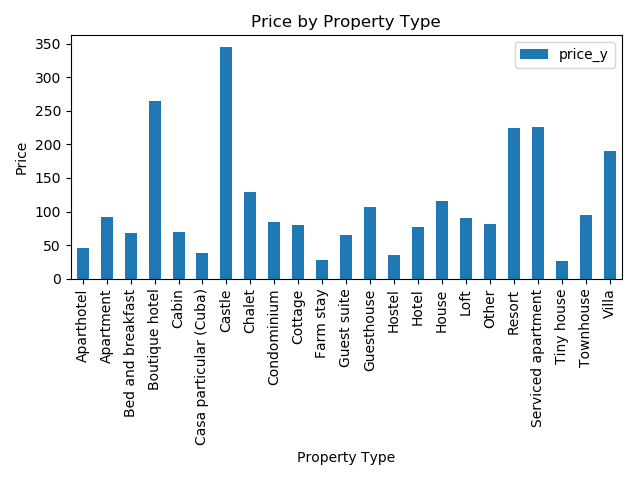

In [19]:
property_chart = prop_type.plot(kind="bar", title="Price by Property Type")
property_chart.set_xlabel("Property Type")
property_chart.set_ylabel("Price")

plt.show()
plt.tight_layout()
plt.savefig("C:/Users/karsa_000/Desktop/airbnb/priceVSpropertytype.png")

In [20]:
#Price VS Zip Code
priceVSzip= airbnb_df[["price_y", "zipcode"]]
priceVSzip.head()

,price_y,zipcode
0,99,41002
1,49,41002
2,55,41003
3,70,41002
4,65,41002


In [21]:
#cleaning zipcode
def fix_zip_codes(zips):
    weird_zips = zips == "Calle Mendoza Ríos, 32, 41002 Sevilla, Spain"
    zips[weird_zips] = np.nan
    weird_zips = (zips == "1001") | (zips == "410003")
    zips[weird_zips] = np.nan
    zips = zips.str.lstrip("CP ")
    
    return zips

In [22]:
priceVSzip["zipcode"] = fix_zip_codes(priceVSzip["zipcode"])
priceVSzip.dropna(inplace=True)
priceVSzip["zipcode"].unique()

C:\Users\karsa_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\karsa_000\Anaconda3\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\karsa_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\karsa_

array(['41002', '41003', '41001', '41004', '41010', '41009', '41012',
       '41006', '41011', '41018', '41007', '41013', '41008', '41005',
       '41020', '41015', '41019', '41014', '41016', '41900', '41920'],
      dtype=object)

In [23]:
zip_code= priceVSzip.groupby('zipcode').mean()
zip_code

,price_y
zipcode,
41001,146.760320
41002,83.611552
41003,86.213075
41004,123.205597
41005,63.290323
41006,42.431373
41007,53.629630
41008,46.587719
41009,50.053571


<IPython.core.display.Javascript object>


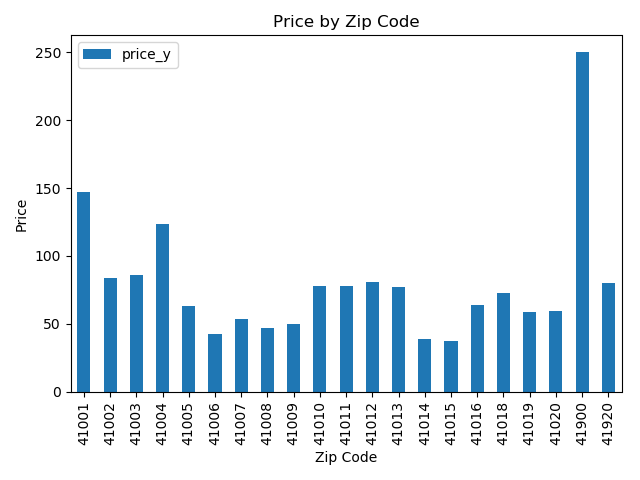

In [38]:
zipcode_chart = zip_code.plot(kind="bar", title="Price by Zip Code")
zipcode_chart.set_xlabel("Zip Code")
zipcode_chart.set_ylabel("Price")

plt.show()
plt.tight_layout()
plt.savefig("C:/Users/karsa_000/Desktop/airbnb/priceVSzipcode.png")

In [25]:
#Occupancy VS Property Type
ocVSproperty= airbnb_df[["Occupancy", "property_type"]]
ocVSproperty.dropna(axis=0, how='all')
ocVSproperty.head()

,Occupancy,property_type
0,63,Apartment
1,106,Apartment
2,6,House
3,112,Apartment
4,103,Apartment


In [26]:
occupancy_prop_type= ocVSproperty.groupby('property_type').mean()
occupancy_prop_type.round()

,Occupancy
property_type,
Aparthotel,138.0
Apartment,176.0
Bed and breakfast,138.0
Boutique hotel,140.0
Cabin,25.0
Casa particular (Cuba),227.0
Castle,167.0
Chalet,156.0
Condominium,176.0


<IPython.core.display.Javascript object>


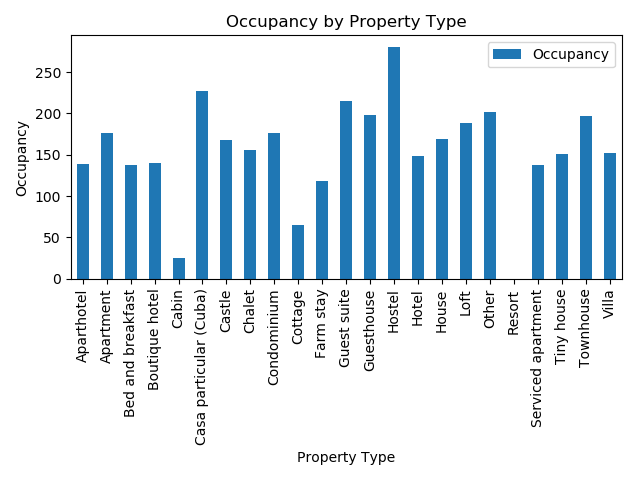

In [39]:
occupancy_property_chart = occupancy_prop_type.plot(kind="bar", title="Occupancy by Property Type")
occupancy_property_chart.set_xlabel("Property Type")
occupancy_property_chart.set_ylabel("Occupancy")

plt.show()
plt.tight_layout()
plt.savefig("C:/Users/karsa_000/Desktop/airbnb/occupancyVSpropertytype.png")

In [28]:
#Occupancy VS Zip Code
occupancyVSzip= airbnb_df[["Occupancy", "zipcode"]]
occupancyVSzip.head()

,Occupancy,zipcode
0,63,41002
1,106,41002
2,6,41003
3,112,41002
4,103,41002


In [29]:
#Cleaning zipcode
occupancyVSzip["zipcode"] = fix_zip_codes(occupancyVSzip["zipcode"])
occupancyVSzip.dropna(inplace=True)
occupancyVSzip["zipcode"].unique()

C:\Users\karsa_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\karsa_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\karsa_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\karsa_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 

array(['41002', '41003', '41001', '41004', '41010', '41009', '41012',
       '41006', '41011', '41018', '41007', '41013', '41008', '41005',
       '41020', '41015', '41019', '41014', '41016', '41900', '41920'],
      dtype=object)

In [30]:
occupancy_zip_code= occupancyVSzip.groupby('zipcode').mean()
occupancy_zip_code.round()

,Occupancy
zipcode,
41001,178.0
41002,177.0
41003,177.0
41004,160.0
41005,180.0
41006,206.0
41007,190.0
41008,208.0
41009,190.0


<IPython.core.display.Javascript object>


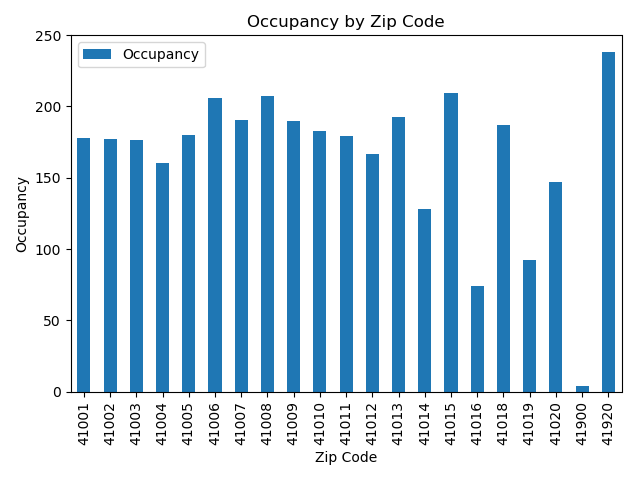

In [40]:
occupancy_zipcode_chart = occupancy_zip_code.plot(kind="bar", title="Occupancy by Zip Code")
occupancy_zipcode_chart.set_xlabel("Zip Code")
occupancy_zipcode_chart.set_ylabel("Occupancy")

plt.show()
plt.tight_layout()
plt.savefig("C:/Users/karsa_000/Desktop/airbnb/occupancyVSzipcode.png")

In [32]:
#Price VS Room Type
priceVSroomty= airbnb_df[["price_y", "room_type_y"]]
priceVSroomty.dropna(axis=0, how='all')
priceVSroomty.head()

,price_y,room_type_y
0,99,Entire home/apt
1,49,Entire home/apt
2,55,Private room
3,70,Entire home/apt
4,65,Entire home/apt


In [33]:
room_type= priceVSroomty.groupby('room_type_y').mean()
room_type

,price_y
room_type_y,
Entire home/apt,108.435484
Private room,42.661554
Shared room,56.571429


<IPython.core.display.Javascript object>


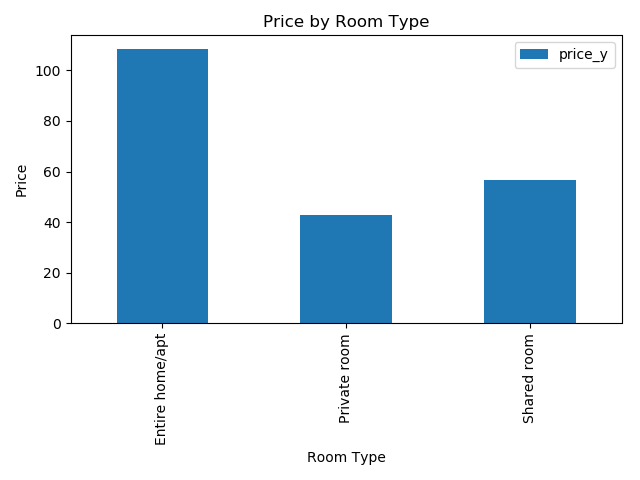

In [41]:
room_chart = room_type.plot(kind="bar", title="Price by Room Type")
room_chart.set_xlabel("Room Type")
room_chart.set_ylabel("Price")

plt.show()
plt.tight_layout()
plt.savefig("C:/Users/karsa_000/Desktop/airbnb/priceVSroomtype.png")

In [35]:
#Occupancy VS Room Type
occupancyVSroomty= airbnb_df[["Occupancy", "room_type_y"]]
occupancyVSroomty.dropna(axis=0, how='all')
occupancyVSroomty.head()

,Occupancy,room_type_y
0,63,Entire home/apt
1,106,Entire home/apt
2,6,Private room
3,112,Entire home/apt
4,103,Entire home/apt


In [36]:
occupancy_room_type= occupancyVSroomty.groupby('room_type_y').mean()
occupancy_room_type

,Occupancy
room_type_y,
Entire home/apt,170.523375
Private room,203.912065
Shared room,141.500000


<IPython.core.display.Javascript object>


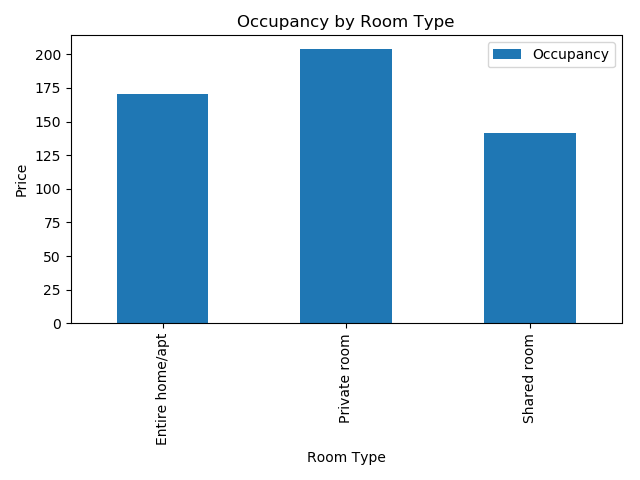

In [42]:
occupancy_room_chart = occupancy_room_type.plot(kind="bar", title="Occupancy by Room Type")
occupancy_room_chart.set_xlabel("Room Type")
occupancy_room_chart.set_ylabel("Price")

plt.show()
plt.tight_layout()
plt.savefig("C:/Users/karsa_000/Desktop/airbnb/occupancyVSroomtytype.png")